# Data Analysis

This notebook contains the actual data analysis for the project

Interesting things to know
- wealth source, inherited, self-made
- gender
- sectors
- residences vs hometown
- ethnicity


## Sectors

The industry-sectors that the individuals wealth can be built on is shown below

1. **Technology**: Covers wealth derived from software, hardware, social media, internet services, and other tech-based industries.
2. **Finance and Investments**: Includes wealth accumulated through banking, hedge funds, private equity, venture capital, and other types of investments.
3. **Retail and eCommerce**: Covers traditional brick-and-mortar retail businesses as well as online marketplaces and other forms of eCommerce.
4. **Real Estate**: Wealth derived from property investments, real estate development, and related activities.
5. **Manufacturing and Industrial**: Covers wealth gained from various manufacturing industries, including automotive, aerospace, chemicals, and more.
6. **Healthcare and Pharmaceuticals**: Wealth from hospitals, medical technology, pharmaceutical companies, and healthcare services.
7. **Energy**: Includes both traditional energy sources (oil, gas, coal) and renewable energy.
8. **Media and Entertainment**: Wealth accumulated through film, television, music, publishing, and other media, as well as sports and other forms of entertainment.
9. **Telecommunications**: Covers wealth derived from companies involved in telephone, internet, and related services.
10. **Food and Beverage**: Includes wealth derived from agriculture, food production, wineries, breweries, restaurants, and related industries.


## Ethnicity and region


This tries to identify the ethnicity of the individuals using two somewhat different catagorisations

### Ethnicities:

- Caucasian
- East Asian
- South Asian
- Arab and North African
- Sub-Saharan African
- Hispanic/Latino
- Other

### Country of Origin or Region:

- Indian Subcontinent
- Russia
- China
- Anglophone (United States, United Kingdom, Australia, Canada, etc.)
- Germany
- Brazil
- Middle East and North Africa (MENA) (beyond the Arab world)
- Sub-Saharan Africa
- Latin America (beyond Brazil)
- East Asia (beyond China)
- South East Asia
- Eastern Europe (beyond Russia)
- Western Europe (beyond Germany and the Anglophone countries)


In [1]:
import pandas as pd
import numpy as np
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import itertools

from scipy.stats import entropy

In [2]:


def load_pickle_file(file_path):
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    return data
    
path_folder = './data/cities_json/London'
figure_folder = '/home/jonno/Dropbox/Apps/ShareLaTeX/Metropolitan 400/figures/'

In [3]:
all_files = os.listdir(path_folder)

In [4]:
path_folder+'/'+all_files[0]

'./data/cities_json/London/Wealth-X Hamad bin Khalifa bin Hamad bin Abdullah bin Jassim Al Thani Dossier.pkl'

## Example exploration of the data

In [5]:
temp_dict = load_pickle_file(path_folder+'/'+all_files[1])

In [6]:
temp_dict['summary']

,Name,Primary Position,Source,Primary Company,Age,Estimated Net Worth,Birthday,Estimated Liquid Assets,Marital Status,Estimated Household Wealth,Alternate Names,Assets,Wealth Trend,Residences,Hometown
0,John Lionel BECKWITH,Chairman,Self-Made,Pacific Investments,72,At least $550 million,19 Mar 1947,At least $430 million,Divorced,-,Sir John Beckwith Assets,At least $430 million Marital Status Divorced ...,Fortune fluctuates with the performance of Pac...,"London, Greater London, United Kingdom",United Kingdom Biography Beckwith co-founded r...


In [7]:
temp_dict['career_history']

,Company,Type,Position Held,YearStarted,YearEnded,Remarks
0,Pacific Investments,Private Company,Chairman,1993,,British multi-asset fund management group that...
1,Rutland Trust,Public Company,Founder,1986,,"Diversified corporate finance, venture capital..."
2,London & Edinburgh Trust,Public Company,Co-founder,,,Real estate firm. Was acquired by Swedish Pens...
3,Argentex,Private Company,Advisory Board Member,,,"Engaged in foreign exchange, is a part of Paci..."


# Wealth type

This section goes through all records and finds tthe whether the source of wealth is inherited or self made

In [9]:
city_json_folder = './data/cities_json'
city_folders_list = os.listdir(city_json_folder )

In [10]:
wealth_source_list = []

for city_name in city_folders_list:

    city_folder = city_json_folder +'/'+ city_name

    all_files = os.listdir(city_folder)

    for file in all_files:

        temp_pd = load_pickle_file(city_folder + '/' + file)
    
        if 'summary' in temp_pd.keys():
                if 'Source' in temp_pd['summary'].columns:
                        value = temp_pd['summary']['Source'].iloc[0]
                else:
                        value =  "Unknown"
        else:
                value =  "Unknown"

        wealth_source_list.append((city_name, value))

        
    

In [11]:

wealth_source_df = pd.DataFrame(wealth_source_list, columns=['city','wealth_source'])

wealth_source_df['wealth_source'] = wealth_source_df['wealth_source'].replace('Inheritance/Self-made', 'Inheritance')
#remove a few error classes
wealth_source_df = wealth_source_df[~wealth_source_df['wealth_source'].str.startswith('(')]

wealth_source_df = wealth_source_df.groupby(['city','wealth_source']).size().reset_index()


wealth_source_df = wealth_source_df.rename(columns={0:'counts'})



wealth_source_df['wealth_source'] = wealth_source_df['wealth_source'].replace('Inheritance/Self-made', 'Inheritance')

wealth_source_df2 = wealth_source_df.pivot(index = 'city', columns='wealth_source', values = 'counts')

wealth_source_df2['self_made_perc'] = wealth_source_df2['Self-Made']/(wealth_source_df2['Inheritance']+wealth_source_df2['Self-Made'])


In [12]:
wealth_source_df2 = wealth_source_df.pivot(index = 'city', columns='wealth_source', values = 'counts')

wealth_source_df2['self_made_perc'] = wealth_source_df2['Self-Made']/(wealth_source_df2['Inheritance']+wealth_source_df2['Self-Made'])

wealth_source_df2

wealth_source,Inheritance,Self-Made,Unknown,self_made_perc
city,,,,
Frankfurt,15,25,292,0.625000
Hong Kong,143,254,1,0.639798
Johannesburg,25,100,1,0.800000
Lagos,50,147,74,0.746193
London,136,259,5,0.655696
Mexico City,66,38,3,0.365385
New York,129,260,9,0.668380
Rio de Janeiro,15,31,6,0.673913
San Francisco Bay Area,61,322,16,0.840731


In [13]:
# Create a color mapping dictionary to assign the same color to each category

cities_list = ['Frankfurt', 'Hong Kong', 'Johannesburg', 'Lagos', 'London',
       'Mexico City', 'New York', 'Rio de Janeiro', 'San Francisco',
       'Sydney']
palette = sns.color_palette("Set3", len(cities_list))
color_mapping = {category: palette[i] for i, category in enumerate(cities_list)}


In [22]:

def resample_group(group):
    n = len(group)
    return group.sample(n, replace=True)

wealth_source_df = pd.DataFrame(wealth_source_list, columns=['city','wealth_source'])

wealth_source_df['wealth_source'] = wealth_source_df['wealth_source'].replace('Inheritance/Self-made', 'Inheritance')
wealth_source_df['city'] = wealth_source_df['city'].replace('San Francisco Bay Area', 'San Francisco')
#remove a few error classes
#wealth_source_df = wealth_source_df[~wealth_source_df['wealth_source'].str.startswith('(')]

wealth_source_df = wealth_source_df.loc[(wealth_source_df['wealth_source']=='Self-Made')|(wealth_source_df['wealth_source']=='Inheritance'),:]

resampled_data = wealth_source_df.groupby(['city', 'wealth_source'], group_keys=False).apply(resample_group)

# Count the occurrences of each combination in the resampled data
resampled_counts = resampled_data.groupby(['city', 'wealth_source']).size().reset_index(name='counts')

# Pivot the resampled data
wealth_source_df2 = resampled_counts.pivot(index='city', columns='wealth_source', values='counts')

# Calculate the 'self_made_perc' column
wealth_source_df2['self_made_perc'] = wealth_source_df2['Self-Made'] / (wealth_source_df2['Inheritance'] + wealth_source_df2['Self-Made'])



In [98]:

# Define the number of bootstrap iterations
num_iterations = 1000  # Adjust as needed

# List to store each iteration's result
bootstrap_results = []

# Assuming wealth_source_df is already defined
for iteration in range(num_iterations):
    # Resample the DataFrame
    resampled_df = wealth_source_df.groupby(['city'], group_keys=False)\
                                   .apply(lambda x: x.sample(len(x), replace=True))

    # Proceed with the rest of the processing
    aggregated_df = resampled_df.groupby(['city','wealth_source']).size().reset_index(name='counts')
    aggregated_df['wealth_source'] = aggregated_df['wealth_source'].replace('Inheritance/Self-made', 'Inheritance')
    pivot_df = aggregated_df.pivot(index='city', columns='wealth_source', values='counts')
    pivot_df['self_made_perc'] = pivot_df.get('Self-Made', 0) / (pivot_df.get('Inheritance', 0) + pivot_df.get('Self-Made', 0))

    # Append the results
    pivot_df['iteration'] = iteration  # Add iteration number for tracking
    bootstrap_results.append(pivot_df)

# Combine all iterations into a single DataFrame
all_iterations_df = pd.concat(bootstrap_results).reset_index().sort_values('self_made_perc')

all_iterations_df['self_made_perc_mean'] = all_iterations_df.groupby('city')['self_made_perc'].transform('mean')

# Sort the DataFrame based on the mean values of 'Value1' in ascending order
all_iterations_df = all_iterations_df.sort_values(by='self_made_perc_mean')

all_iterations_df.groupby('city').mean()

wealth_aquisition_full = all_iterations_df.copy()

In [37]:
all_iterations_df.groupby('city').mean().sort_values('self_made_perc')

wealth_source,Inheritance,Self-Made,self_made_perc,iteration,self_made_perc_mean
city,,,,,
Mexico City,66.177,37.823,0.363683,499.5,0.363683
Frankfurt,15.091,24.909,0.622725,499.5,0.622725
Hong Kong,143.392,253.608,0.638811,499.5,0.638811
London,136.203,258.797,0.655182,499.5,0.655182
Rio de Janeiro,15.271,30.729,0.668022,499.5,0.668022
New York,129.051,259.949,0.668249,499.5,0.668249
Sydney,58.059,168.941,0.744233,499.5,0.744233
Lagos,50.236,146.764,0.744995,499.5,0.744995
Johannesburg,24.846,100.154,0.801232,499.5,0.801232


/tmp/ipykernel_14206/859093450.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(y) for y in ax.get_yticks()])


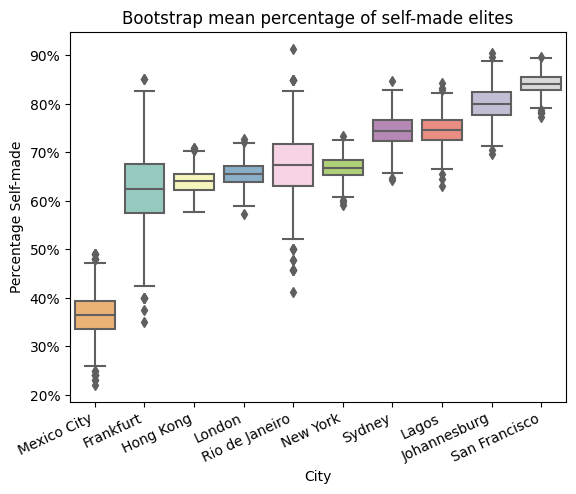

In [35]:


sns.boxplot(data = all_iterations_df, x = 'city', y = 'self_made_perc', palette=color_mapping)
plt.xticks(rotation=25, ha="right") 

ax = plt.gca()
ax.set_yticklabels(['{:.0%}'.format(y) for y in ax.get_yticks()])

plt.title('Bootstrap mean percentage of self-made elites')
plt.ylabel('Percentage Self-made')
plt.xlabel('City')
plt.savefig(figure_folder+"mean_self_made.pdf")
plt.show()


In [25]:

model = ols('self_made_perc ~ city', data=all_iterations_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA results
print("ANOVA Table:")
print(anova_table)

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=all_iterations_df['self_made_perc'], groups=all_iterations_df['city'], alpha=0.05)

# Print Tukey's HSD results
print("\nTukey's HSD Results:")
tukey_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])

# Filter and print group comparisons with negative HSD values
negative_hsd_comparisons = tukey_df[tukey_df.reject != True]
print("\nGroup Comparisons with Negative HSD:")
print(negative_hsd_comparisons)

ANOVA Table:
              sum_sq      df            F  PR(>F)
city      151.321321     9.0  9452.069826     0.0
Residual   17.770358  9990.0          NaN     NaN

Tukey's HSD Results:

Group Comparisons with Negative HSD:
      group1          group2  meandiff   p-adj   lower   upper  reject
29     Lagos          Sydney   -0.0004  1.0000 -0.0064  0.0055   False
39  New York  Rio de Janeiro    0.0042  0.4293 -0.0017  0.0102   False


In [99]:
binary_gics_city = pd.read_csv('./data/binary_gics_city.csv')


num_iterations = 1000  # Adjust as needed

# List to store each iteration's result
bootstrap_results = []

# Assuming wealth_source_df is already defined
for iteration in range(num_iterations):
    # Resample the DataFrame

    resampled_df = binary_gics_city.groupby(['city'], group_keys=False)\
                                   .apply(lambda x: x.sample(len(x), replace=True))
    gics_totals = resampled_df.groupby('city').sum()

    gics_distrib = gics_totals.div(gics_totals.sum(axis = 1), axis = 0)


    gics_entropy_values = gics_distrib.apply(lambda row: entropy(row), axis=1).reset_index()
    bootstrap_results.append(gics_entropy_values)

# Combine all iterations into a single DataFrame
all_iterations_df = pd.concat(bootstrap_results).reset_index(drop = True)
all_iterations_df = all_iterations_df.rename(columns={0:'entropy'})

all_iterations_df['entropy_mean'] = all_iterations_df.groupby('city')['entropy'].transform('mean')

# Sort the DataFrame based on the mean values of 'Value1' in ascending order
all_iterations_df = all_iterations_df.sort_values(by='entropy_mean')#.drop('entropy_mean', axis=1)

#normalised the entropy in nat
all_iterations_df['entropy_norm'] = all_iterations_df['entropy']/-np.log(1/11)


gics_full = all_iterations_df.copy()


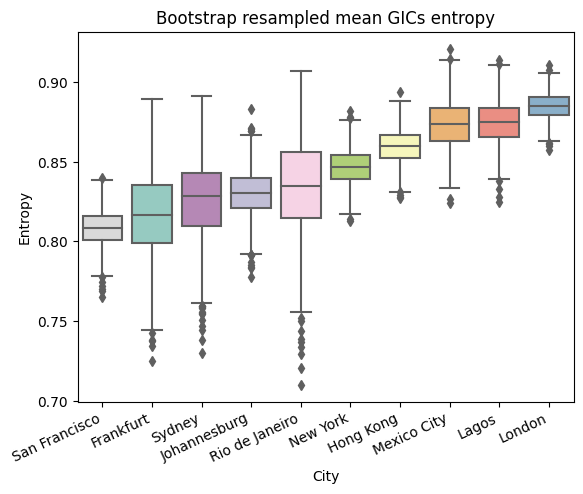

In [93]:

sns.boxplot(data = all_iterations_df, x = 'city', y = 'entropy_norm', palette=color_mapping)

plt.xticks(rotation=25, ha="right") 
plt.title('Bootstrap resampled mean GICs entropy')
plt.ylabel('Entropy')
plt.xlabel('City')
plt.savefig(figure_folder+"mean_gics_entropy.pdf")
plt.show()

In [28]:

model = ols('entropy ~ city', data=all_iterations_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA results
print("ANOVA Table:")
print(anova_table)

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=all_iterations_df['entropy'], groups=all_iterations_df['city'], alpha=0.05)

# Print Tukey's HSD results
print("\nTukey's HSD Results:")
tukey_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])

# Filter and print group comparisons with negative HSD values
negative_hsd_comparisons = tukey_df[tukey_df.reject != True]
print("\nGroup Comparisons with Negative HSD:")
print(negative_hsd_comparisons)

ANOVA Table:
             sum_sq      df            F  PR(>F)
city      36.496484     9.0  2310.804834     0.0
Residual  17.531163  9990.0          NaN     NaN

Tukey's HSD Results:

Group Comparisons with Negative HSD:
   group1       group2  meandiff   p-adj   lower   upper  reject
25  Lagos  Mexico City   -0.0057  0.0717 -0.0116  0.0002   False


# country of residence diversity

In [40]:
country_res = pd.read_csv('./data/country_residence_matrix.csv')

In [74]:
country_matrix = country_res.drop(['file', 'error', 'Residences', 'reference_country', 'color', 'city_ascii_list'], 
                                  axis = 1)
country_matrix = country_matrix.rename(columns = {'reference_city':'city'})

country_matrix['city'] = country_matrix['city'].str.title().str.replace(' De ', ' de ')


,georgia,vietnam,germany,panama,new zealand,greece,uganda,kuwait,barbados,romania,...,south africa,luxembourg,canada,japan,nicaragua,nigeria,norway,uruguay,yemen,macau
city,,,,,,,,,,,,,,,,,,,,,
Frankfurt,0,0,331,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Hong Kong,0,2,0,0,0,0,0,0,0,0,...,0,0,16,4,0,0,0,0,0,4
Johannesburg,0,0,0,0,0,0,0,0,0,0,...,126,0,0,0,0,0,0,0,0,0
Lagos,3,0,0,0,0,1,1,0,0,0,...,2,0,0,1,1,265,0,0,0,0
London,0,0,4,2,2,7,0,1,5,0,...,9,0,5,0,0,10,3,1,3,0
Mexico City,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
New York,2,0,1,2,2,3,0,1,0,1,...,3,0,3,1,1,0,0,1,0,0
Rio de Janeiro,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
San Francisco,0,0,2,0,0,0,0,0,0,0,...,1,0,7,2,0,0,0,0,0,0


In [100]:
num_iterations = 1000  # Adjust as needed

# List to store each iteration's result
bootstrap_results = []

# Assuming wealth_source_df is already defined
for iteration in range(num_iterations):
    # Resample the DataFrame

    resampled_df = country_matrix.groupby(['city'], group_keys=False)\
                                   .apply(lambda x: x.sample(len(x), replace=True))
    country_totals = resampled_df.groupby('city').sum()

    country_distrib = country_totals.div(country_totals.sum(axis = 1), axis = 0)


    country_entropy_values = country_distrib.apply(lambda row: entropy(row), axis=1).reset_index()
    bootstrap_results.append(country_entropy_values)

# Combine all iterations into a single DataFrame
all_iterations_df = pd.concat(bootstrap_results).reset_index(drop = True)
all_iterations_df = all_iterations_df.rename(columns={0:'entropy'})

all_iterations_df['entropy_mean'] = all_iterations_df.groupby('city')['entropy'].transform('mean')

# Sort the DataFrame based on the mean values of 'Value1' in ascending order
all_iterations_df = all_iterations_df.sort_values(by='entropy_mean')#.drop('entropy_mean', axis=1)

all_iterations_df['entropy_norm'] = all_iterations_df['entropy']/-np.log(1/85)

globalisation_full = all_iterations_df.copy()


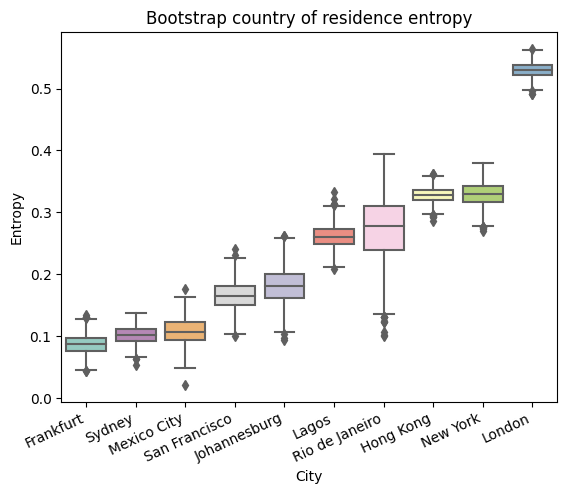

In [96]:
sns.boxplot(data = all_iterations_df, x = 'city', y = 'entropy_norm', palette=color_mapping)

plt.xticks(rotation=25, ha="right") 
plt.title('Bootstrap country of residence entropy')
plt.ylabel('Entropy')
plt.xlabel('City')
plt.savefig(figure_folder+"mean_residence_entropy.pdf")
plt.show()

In [97]:
model = ols('entropy ~ city', data=all_iterations_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA results
print("ANOVA Table:")
print(anova_table)

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=all_iterations_df['entropy'], groups=all_iterations_df['city'], alpha=0.05)

# Print Tukey's HSD results
print("\nTukey's HSD Results:")
tukey_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])

# Filter and print group comparisons with negative HSD values
negative_hsd_comparisons = tukey_df[tukey_df.reject != True]
print("\nGroup Comparisons with Negative HSD:")
print(negative_hsd_comparisons)

ANOVA Table:
               sum_sq      df             F  PR(>F)
city      3352.490232     9.0  31812.567302     0.0
Residual   116.974657  9990.0           NaN     NaN

Tukey's HSD Results:

Group Comparisons with Negative HSD:
       group1    group2  meandiff   p-adj   lower   upper  reject
13  Hong Kong  New York    0.0058  0.9724 -0.0095  0.0211   False


In [222]:
means_df = gics_full.groupby('city')['entropy_norm'].mean().reset_index().rename(columns = {'entropy_norm':'gics'}).merge(

wealth_aquisition_full.groupby('city')['self_made_perc'].mean().reset_index(), on = 'city'


).merge(

globalisation_full.groupby('city')['entropy_norm'].mean().reset_index().rename(columns = {'entropy_norm':'globalisation'}),

on = 'city'
)

position_data = means_df[['gics','self_made_perc', 'globalisation']]


means_df

,city,gics,self_made_perc,globalisation
0,Frankfurt,0.817050,0.625175,0.086581
1,Hong Kong,0.859729,0.640562,0.327729
2,Johannesburg,0.829745,0.801472,0.180606
3,Lagos,0.874772,0.746289,0.259116
4,London,0.884975,0.656792,0.527757
5,Mexico City,0.873646,0.366183,0.109301
6,New York,0.846103,0.669080,0.328509
7,Rio de Janeiro,0.833156,0.675652,0.275268
8,San Francisco,0.807708,0.840222,0.166352
9,Sydney,0.825140,0.744238,0.101873


In [152]:
position_data.max(axis = 0)-position_data.min(axis = 0)

gics              0.077267
self_made_perc    0.474039
globalisation     0.441176
dtype: float64

In [155]:
from sklearn.decomposition import PCA



# Initialize PCA and set the number of components to 2
pca = PCA(n_components=2)

# Fit and transform the data
reduced_data = pca.fit_transform(position_data)

# Convert the reduced data back to a DataFrame
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

# Optionally, you can concatenate the names back
final_df = pd.concat([means_df[['city']], reduced_df], axis=1)

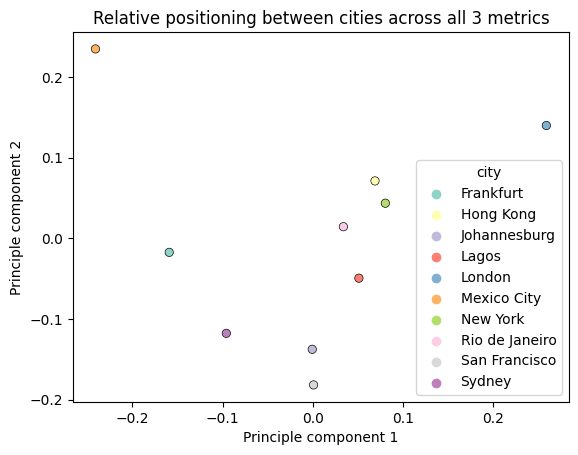

In [231]:
#fig = plt.figure(figsize=(10, 4)) 
sns.scatterplot(data = final_df, x = 'PC1', y = 'PC2', hue = 'city', palette=color_mapping, edgecolor='black')

plt.title('Relative positioning between cities across all 3 metrics')

plt.ylabel('Principle component 2')
plt.xlabel('Principle component 1')
plt.savefig(figure_folder+"principle_component scatterplot.pdf")

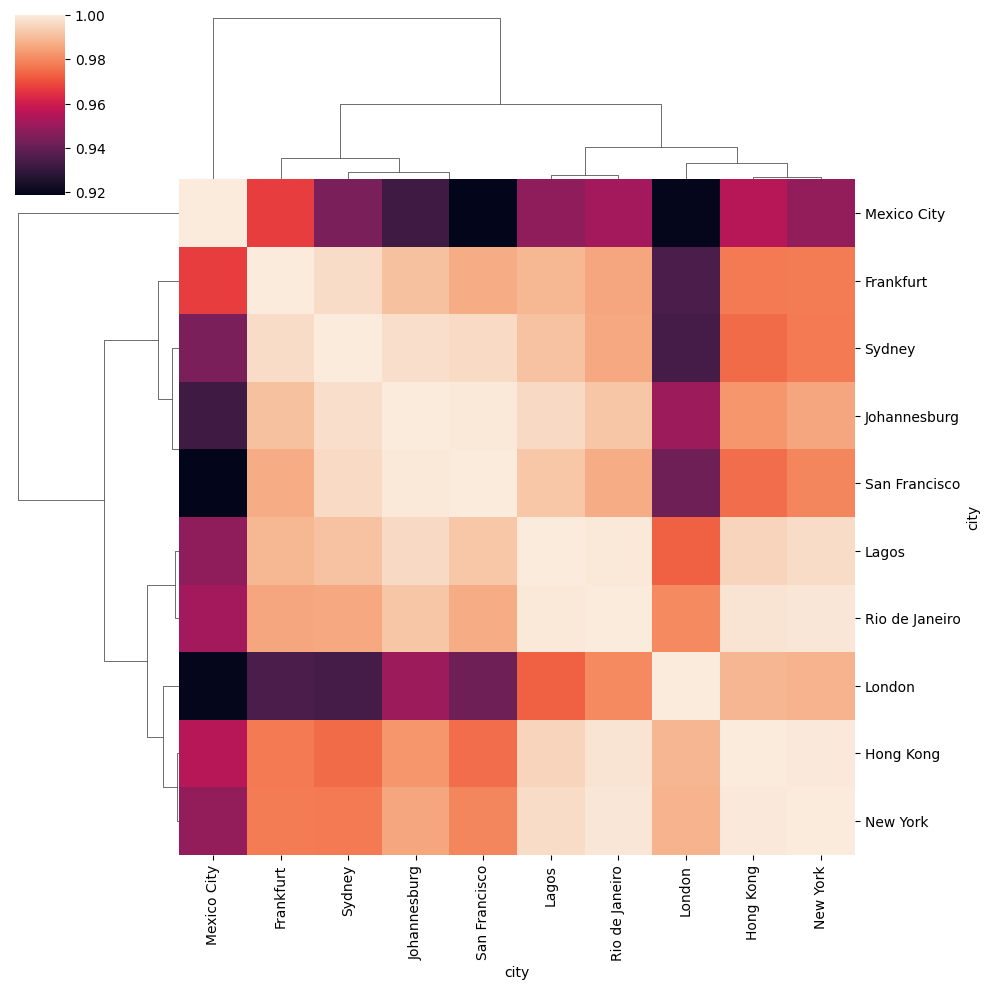

In [159]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(position_data, position_data )

names = means_df['city']

similarity_df = pd.DataFrame(similarity_matrix, index=names, columns=names)


sns.clustermap(similarity_df, metric = 'correlation')

In [171]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

Z = linkage(position_data, method='ward')  

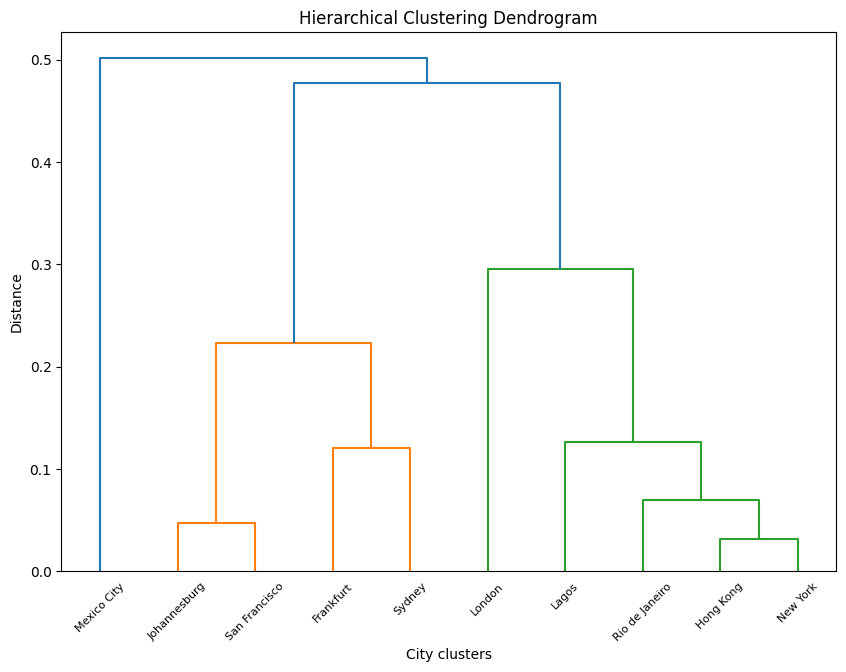

In [219]:
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, labels=means_df['city'].values,leaf_rotation=45, leaf_font_size=8)
plt.xlabel('City clusters')
plt.ylabel('Distance')
plt.savefig(figure_folder+"dendrogram.pdf")
plt.show()

In [212]:


df = pd.DataFrame(list(itertools.product([0, 1], repeat=3)), 
                  columns=['gics', 'self_made_perc', 'globalisation'])


mappings = {
    'gics': {1: 'diversified economy', 0: 'low diversity economy'},
    'self_made_perc': {1: 'high social mobility', 0: 'low social mobility'},
    'globalisation': {1: 'outward facing', 0: 'inward facing'}
}

In [211]:
(position_data.rank()>5)

,gics,self_made_perc,globalisation,Combined_String
0,False,False,False,False
1,True,False,True,True
2,False,True,False,False
3,True,True,True,True
4,True,False,True,True
5,True,False,False,True
6,True,False,True,True
7,False,True,True,False
8,False,True,False,False
9,False,True,False,False


In [223]:
bin_res = (position_data.rank()>5)
means_df['city type'] = bin_res.apply(lambda row: ' '.join(mappings[col][row[col]] for col in mappings.keys()), axis=1)
out = means_df.sort_values('city type').round(2)

out.to_csv(figure_folder+"dendrogram.csv")
out

,city,gics,self_made_perc,globalisation,city type
3,Lagos,0.87,0.75,0.26,diversified economy high social mobility outwa...
5,Mexico City,0.87,0.37,0.11,diversified economy low social mobility inward...
1,Hong Kong,0.86,0.64,0.33,diversified economy low social mobility outwar...
4,London,0.88,0.66,0.53,diversified economy low social mobility outwar...
6,New York,0.85,0.67,0.33,diversified economy low social mobility outwar...
2,Johannesburg,0.83,0.80,0.18,low diversity economy high social mobility inw...
8,San Francisco,0.81,0.84,0.17,low diversity economy high social mobility inw...
9,Sydney,0.83,0.74,0.10,low diversity economy high social mobility inw...
7,Rio de Janeiro,0.83,0.68,0.28,low diversity economy high social mobility out...
0,Frankfurt,0.82,0.63,0.09,low diversity economy low social mobility inwa...


In [225]:
out.groupby(['city type', 'city' ]).size()

city type                                                  city          
diversified economy high social mobility outward facing    Lagos             1
diversified economy low social mobility inward facing      Mexico City       1
diversified economy low social mobility outward facing     Hong Kong         1
                                                           London            1
                                                           New York          1
low diversity economy high social mobility inward facing   Johannesburg      1
                                                           San Francisco     1
                                                           Sydney            1
low diversity economy high social mobility outward facing  Rio de Janeiro    1
low diversity economy low social mobility inward facing    Frankfurt         1
dtype: int64